# 한신대학교 e-비즈니스학과 201646006 이성범 PD학기제

# GAN 이란?

Generative Adversarial Network, 줄여서 GAN은 생성적 적대 신경망이라고 한다. GAN의 목적은 새로운 데이터를 생성하는 것이 때문에 Generative라는 단어가 들어가고 GAN의 학습 방법이 Generator와 Discriminator의 대결을 통한 방식이기 때문에 Adversarial라는 단어가 들어간다. 마지막으로 GAN의 각각의 모델인 Generator과 Discriminator의 구조가 신경망이기 때문에 Network라고 하는 것이다.

GAN은 2014년 NIPS에서 발표된 Generative Adversarial Networks(Ian Goodfellow 등)라는 논문에서 소개된 모델이다. 논문처럼 GAN을 설명할 때는 흔히 지폐위조범과 경찰에 비유하여 설명을 한다. Generator라고 부르는 지폐위조범이 Discriminator라고 불리는 경찰을 열심히 속이려고 하고 경찰은 위조된 지폐를 진짜와 감별하려고 노력한다. 경찰과 지폐위조범의 속고 속이는 경쟁 속에서 서로의 능력은 계속 발전하고 지폐위조범은 진짜 지폐와 구별을 할 수 없을 정도의 위조지폐를 만들게 된다는 것이다.

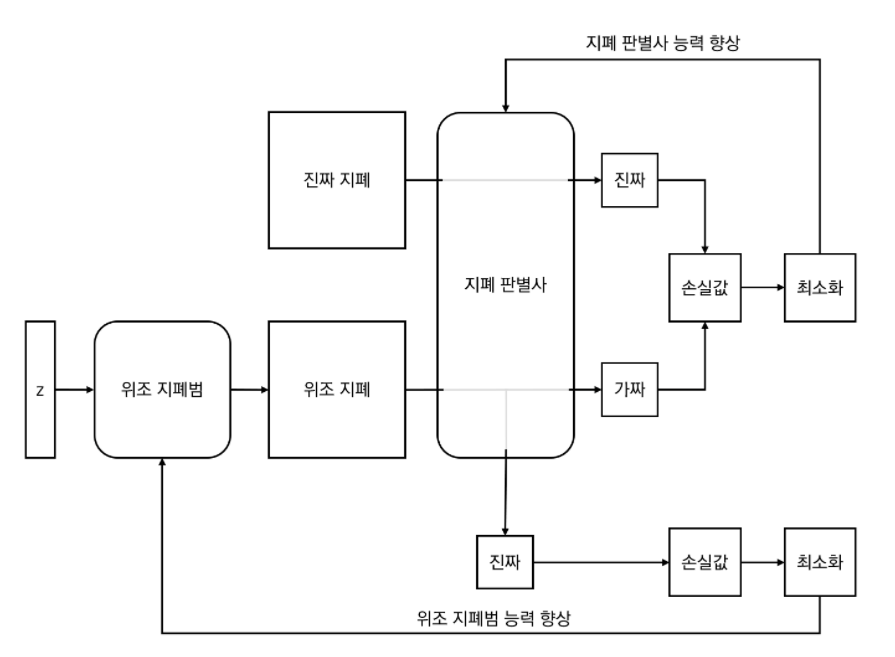

위의 그림은 GAN의 학습과정을 나타낸 것이다. Gaussian Distribution에서 무작위로 추출한 데이터 Z를 통하여 Generator가 G(z)라는 위조 지폐를 만들고 Discriminator는 진짜 지폐와 G(z)를 판별하는 각각 Loss를 구한 후 더해 그 Loss가 최소가 되는 방향으로 학습 진행된다. Generator는 가짜 지폐를 Discriminator가 진짜 지폐라고 판별하는 Loss를 구한 후 그 Loss가 최소가 되는 방향으로 학습이 진행된다. 간단하게 요약하자면 Discriminator의 판별 능력을 바탕으로 Generator와 Discriminator의 학습 방향이 결정되는 것이다.

- Discriminator의 학습 과정: D의 역할은 진짜 데이터를 진짜로, 가짜 데이터를 가짜로 분류하는 것, 따라서 input으로 가짜, 진짜 데이터 모두 필요하며 가짜는 0, 진짜는 1로 Label을 설정해 학습을 진행한다.

- Generator의 학습 과정: GAN의 최종 목적은 데이터를 생성하는 것이기 때문에 G를 학습시켜야 한다. G를 잘 학습시키기 위해서는 D를 잘 속여야 하며 z로 부터 G가 가짜 데이터를 만들고 이를 D에 input으로 넣어 1로 Label을 설정해 학습을 진행한다.

- GAN의 단점
 1. 판별자의 마지막 활성화 함수인 simoid 함수로 인핸 Vanishing Gradient 문제가 발생한다.
 2. G의 목적은 D를 속이는 것인데, 이는 D가 속기만 하면 된다는 것으로 해석될 수 있어 G가 어떤 특정 데이터를 만들더니 D가 속더라에 빠지게 된다면 G는 그 특정 데이터만 만들려고 노력할 것이며 이렇듯 GAN은 쉽게 데이터의 다양성이 사라지는 Mode Collapse 문제점이 발생할 수 있다.
 3. 하이퍼 파라미터가 많고 모델이 매우 민감하다.
 4. 평가지표가 불충분하다.

# GAN 아키텍처의 종류


- DCGAN : DCGAN은 2016년 ICLR에서 발표된 Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks(Alec Radford 등) 논문에서 소개된 모델로 GAN에 CNN을 결합한 모델이다. CNN을 결합하여 성공적인 결과물을 가져왔다는 점에서 큰 의의를 가지는 모델이다.

- BIgGAN : BIgGAN은 2018년에 발표된 Large Scale GAN Training for High Fidelity Natural Image Synthesis(Andrew Brock 등) 논문에서 소개된 모델로 매우 고품질의 이미지를 생성해낼 수 있는 GAN 모델이다.

- CycleGAN : CycleGAN은 2017년 발표된 Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks(Jun-Yan Zhu 등) 논문에서 소개된 모델로 특정 화가의 그림을 사진으로, 여름 사진을 겨울 사진으로, 귤을 사과로 등 다양한 도메인을 Transfer시킬 수 있는 GAN 모델이다.

- StarGAN : StarGAN은 2018년 발표된 StarGAN: Unified Generative Adversarial Networks for Multi-Domain Image-to-Image Translation(Yunjey Choi 등) 논문에서 소개된 모델로 input 이미지의 피부 표정 등을  Transfer시킬 수 있는 GAN 모델이다.

- CAN : CAN은 2017년에 발표된 CAN: Creative Adversarial Networks, Generating "Art" by Learning About Styles and Deviating from Style Norms(Ahmed Elgammal 등) 논문에서 소개된 모델로 실제 예술품과 유사한 예술품을 생성하는 GAN 모댈이다. 

- SRGAN : SRGAN은 2017년에 발표된 Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network(Christian Ledig 등) 논문에서 소개된 모델로 저해상도 이미지를 고해상도 이미지로 복원하는 GAN 모델이다.

이 밖에도 정말 다양한 GAN 모델들이 존재한다.

# GAN 실습

DCGAN을 구축하여 MNIST 데이터를 생성하는 실습을 진행했다.

In [ ]:
import os
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 환경설정
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print(DEVICE)

cuda


In [ ]:
EPOCHS = 20
BATCH_SIZE = 128
z_size = 72 # Latent Vector의 크기

In [ ]:
trainset = datasets.MNIST("./data", train=True, download=True, 
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
)
train_loader = torch.utils.data.DataLoader(dataset = trainset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
class GNet(nn.Module):
    def __init__(self):
        super().__init__()
        self._layers = nn.Sequential(
            nn.ConvTranspose2d(z_size, 32, 3, 1, 0, bias=False), # 1 -> 3
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=False),
            nn.ConvTranspose2d(32, 16, 4, 2, 1, bias=False), # 3 -> 6
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=False),
            nn.ConvTranspose2d(16, 8, 4, 2, 0, bias=False), # 6 -> 14
            nn.BatchNorm2d(8),
            nn.ReLU(inplace=False),
            nn.ConvTranspose2d(8, 1, 4, 2, 1, bias=False), # 14 -> 28
            nn.Tanh()
        )

    def forward(self, x):
        return self._layers(x) 

In [ ]:
class DNet(nn.Module):
    def __init__(self):
        super().__init__()
        self._layers = nn.Sequential(
            nn.Conv2d(1, 8, 4, 2, 1, bias=False), # 28 -> 14
            nn.BatchNorm2d(8),
            nn.LeakyReLU(0.2, inplace=False),
            nn.Conv2d(8, 16, 4, 2, 1, bias=False), # 14 -> 7
            nn.BatchNorm2d(16),
            nn.LeakyReLU(0.2, inplace=False),            
            nn.Conv2d(16, 32, 4, 2, 1, bias=False), # 7 -> 3
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=False),              
            nn.Conv2d(32, 1, 4, 2, 1, bias=False), # 3 -> 1
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self._layers(x).squeeze()

In [ ]:
D = DNet().to(DEVICE)
G = GNet().to(DEVICE)

criterion = nn.BCELoss()

d_optimizer = optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = optim.Adam(G.parameters(), lr=0.0002)

real_labels = torch.ones(BATCH_SIZE).to(DEVICE)
fake_labels = torch.zeros(BATCH_SIZE).to(DEVICE)

Epoch[1/20] d_loss: 0.0951, g_loss: 3.5014, D(x): 0.96, D(G(z)): 0.05


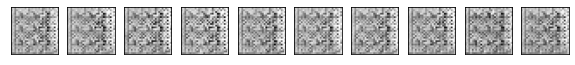

Epoch[2/20] d_loss: 0.0417, g_loss: 4.3263, D(x): 0.98, D(G(z)): 0.03


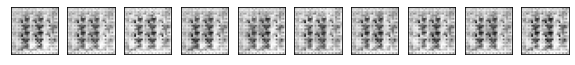

Epoch[3/20] d_loss: 0.0336, g_loss: 4.8480, D(x): 0.98, D(G(z)): 0.02


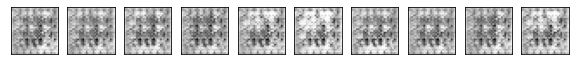

Epoch[4/20] d_loss: 0.0241, g_loss: 5.0723, D(x): 0.99, D(G(z)): 0.01


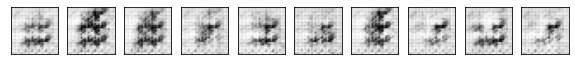

Epoch[5/20] d_loss: 0.0370, g_loss: 5.7267, D(x): 0.99, D(G(z)): 0.02


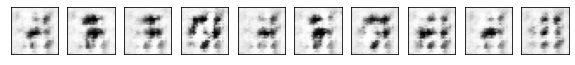

Epoch[6/20] d_loss: 0.0204, g_loss: 5.7072, D(x): 1.00, D(G(z)): 0.02


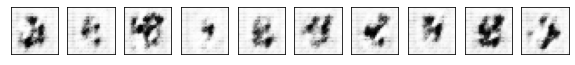

Epoch[7/20] d_loss: 0.0434, g_loss: 5.0058, D(x): 0.98, D(G(z)): 0.02


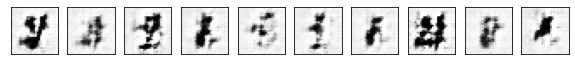

Epoch[8/20] d_loss: 0.0553, g_loss: 4.8136, D(x): 0.96, D(G(z)): 0.02


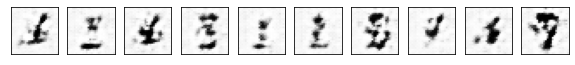

Epoch[9/20] d_loss: 0.0807, g_loss: 3.3758, D(x): 0.98, D(G(z)): 0.05


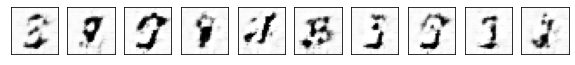

Epoch[10/20] d_loss: 0.0894, g_loss: 3.9665, D(x): 0.96, D(G(z)): 0.04


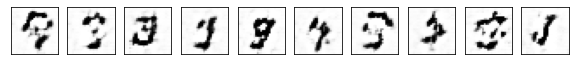

Epoch[11/20] d_loss: 0.0879, g_loss: 3.0421, D(x): 0.96, D(G(z)): 0.04


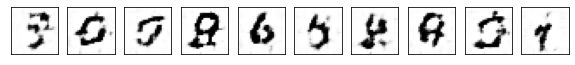

Epoch[12/20] d_loss: 0.1890, g_loss: 3.5023, D(x): 0.89, D(G(z)): 0.06


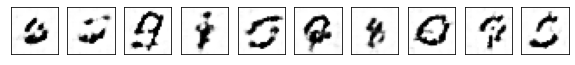

Epoch[13/20] d_loss: 0.2280, g_loss: 3.8110, D(x): 0.89, D(G(z)): 0.07


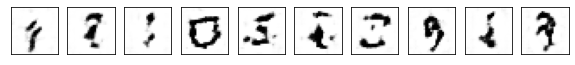

Epoch[14/20] d_loss: 0.2567, g_loss: 3.0747, D(x): 0.89, D(G(z)): 0.11


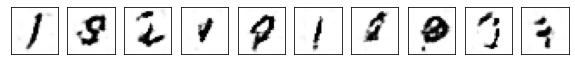

Epoch[15/20] d_loss: 0.1039, g_loss: 4.5212, D(x): 0.93, D(G(z)): 0.03


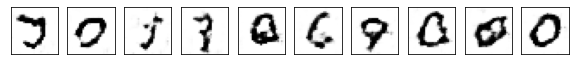

Epoch[16/20] d_loss: 0.2488, g_loss: 2.3446, D(x): 0.88, D(G(z)): 0.09


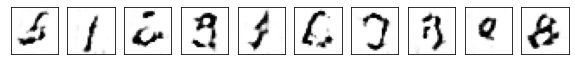

Epoch[17/20] d_loss: 0.3825, g_loss: 1.7771, D(x): 0.89, D(G(z)): 0.20


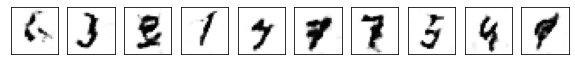

Epoch[18/20] d_loss: 0.2029, g_loss: 3.1066, D(x): 0.92, D(G(z)): 0.10


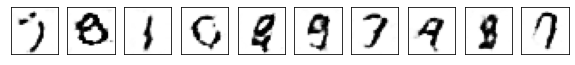

Epoch[19/20] d_loss: 0.3473, g_loss: 3.0210, D(x): 0.84, D(G(z)): 0.12


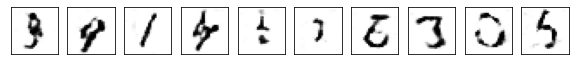

Epoch[20/20] d_loss: 0.3173, g_loss: 3.1448, D(x): 0.82, D(G(z)): 0.09


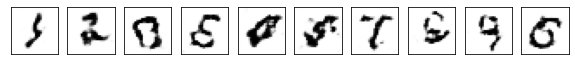

In [ ]:
for epoch in range(1, EPOCHS + 1):
    for i, (images, _) in enumerate(train_loader):
        images = images.to(DEVICE)

        # 1. 판별자 학습
        outputs = D(images) # 진짜 이미지에 대한 output
        d_loss_real = criterion(outputs, real_labels) # 진짜 이미지에 대한 Loss
        real_score = outputs

        z = torch.randn(BATCH_SIZE, z_size, 1, 1).to(DEVICE) # 표준정규분포에서 Latent Vector를 랜덤하게 추출
        fake_images = G(z) # 가짜 이미지를 생성
        outputs = D(fake_images.detach()) # 가짜 이미지에 대한 output
        d_loss_fake = criterion(outputs, fake_labels) # 가짜 이미지에 대한 Loss
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake # 진짜 이미지와 가짜 이미지에 대한 Loss의 합을 구함
        d_optimizer.zero_grad()
        d_loss.backward() 
        d_optimizer.step() # 구한 Loss를 바탕으로 판별자를 학습

        # 2. 생성자 학습
        outputs = D(fake_images) # 가짜 이미지에 대한 output
        g_loss = criterion(outputs, real_labels) # 가짜 이미지를 진짜로 판별하여 구한 Loss
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step() # 구한 Loss를 바탕으로 생성자를 학습

    print(f'Epoch[{epoch}/{EPOCHS}] d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')

    # 3. 생성자의 학습 결과 확인
    # 표준정규분포에서 Latent Vector를 랜덤하게 추출하여 이미지를 생성
    z = torch.randn(BATCH_SIZE, z_size, 1, 1).to(DEVICE)
    fake_images = G(z).cpu()
    f, a = plt.subplots(1, 10, figsize = (10, 4))
    for i in range(10):
      img = np.reshape(fake_images[i].view(-1, 28 * 28).detach().numpy(), (28, 28))
      a[i].imshow(img, cmap = "gray_r")
      a[i].set_xticks(())
      a[i].set_yticks(())
    plt.show()

Epoch이 증가함에 따라 점점 더 이미지를 잘 생성한다는 것을 확인할 수 있다.

# 참고자료

- 파이썬 머신러닝 완벽 가이드, 권철민
- 파이썬 딥러닝 파이토치, 이경택
- 핸즈온 머신러닝, 박해선
- 데이터 사이언스 스쿨, https://datascienceschool.net/
- 데이터 분석 대표 대학생 연합 동아리 Tobigs, http://www.datamarket.kr/
- DeepLearnig.AI Course 1 ~ 5, Andrew Ng, https://www.youtube.com/c/Deeplearningai/playlists
- 모두를 위한 딥러닝 시즌 1, https://www.youtube.com/playlist?list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm
- 모두를 위한 딥러닝 시즌 2, https://deeplearningzerotoall.github.io/season2/
- T아카데미 Scikit-Learn으로 다지는 머신러닝 기초, 강천성, https://tacademy.skplanet.com/live/player/onlineLectureDetail.action
- Pytorch로 시작하는 딥 러닝 입문, 유원준, https://wikidocs.net/book/2788
- 1시간만에 GAN(Generative Adversarial Network) 완전 정복하기, 최윤제(고려대 석사과정), https://www.youtube.com/watch?v=odpjk7_tGY0&t=5s
- GAN: Generative Adversarial Networks(꼼꼼한 딥러닝 논문 리뷰와 코드 실습), 나동빈, https://www.youtube.com/watch?v=AVvlDmhHgC4
- T아카데미 딥러닝을 위한 PyTorch 활용법, 최건호, https://tacademy.skplanet.com/live/player/onlineLectureDetail.action?seq=128
- https://neptune.ai/blog/6-gan-architectures
- https://en.wikipedia.org/wiki/Generative_adversarial_network
- https://developers.google.com/machine-learning/gan/gan_structure
- http://www.gisdeveloper.co.kr/?p=8660